## Instalando as libs

In [16]:
!pip install -r ../../requirements.txt

## Importando libs instaladas

In [17]:
import re
import nltk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

## Carregando o Dataset

In [18]:
file_path = '../../data/raw/data.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Análise Exploratória

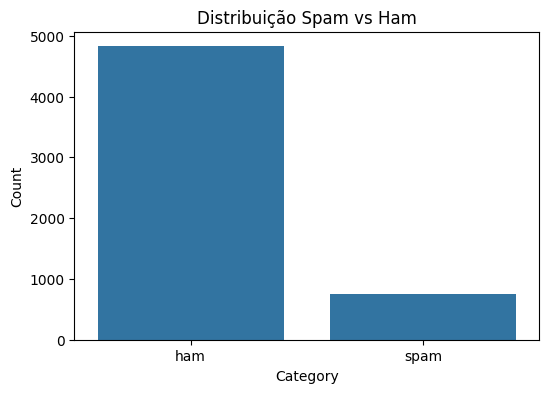

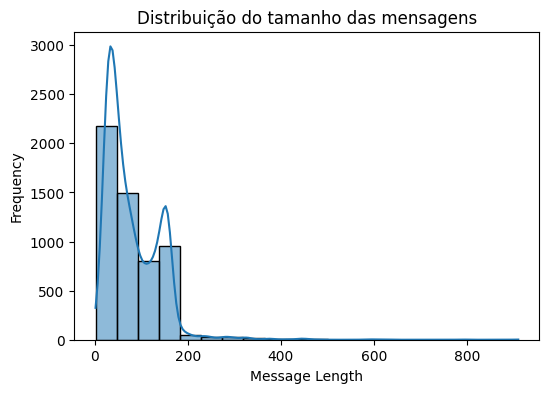

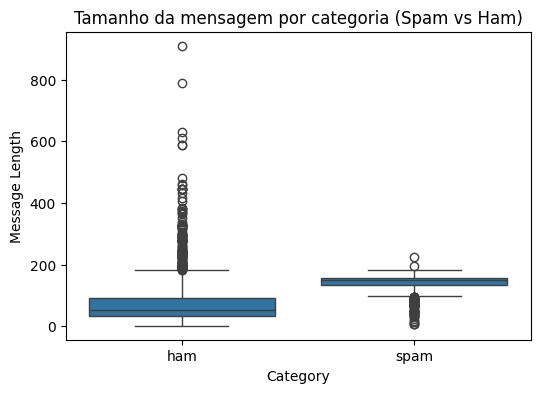

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Category')
plt.title('Distribuição Spam vs Ham')
plt.ylabel('Count')
plt.show()

df['message_length'] = df['Message'].apply(len)

plt.figure(figsize=(6,4))
sns.histplot(df['message_length'], bins=20, kde=True)
plt.title('Distribuição do tamanho das mensagens')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Category', y='message_length')
plt.title('Tamanho da mensagem por categoria (Spam vs Ham)')
plt.ylabel('Message Length')
plt.show()

## PLN

In [20]:
nltk.download('stopwords')
nltk.download('wordnet')


lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\d+', '', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    tokens = text.split()
    tokens = [stemmer.stem(lemmatizer.lemmatize(word)) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['processed_message'] = df['Message'].apply(preprocess_text)
df[['Message', 'processed_message']].head()


[nltk_data] Downloading package stopwords to /home/caze/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/caze/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Message,processed_message
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though


In [21]:
df.to_csv('../../data/processed/data.csv', index=False)